In [1]:
from datasets import load_dataset
from transformers import LlamaTokenizer


tokenizer = LlamaTokenizer.from_pretrained("decapoda-research/llama-7b-hf", add_eos_token=True)
tokenizer.pad_token = tokenizer.eos_token
tokenizer.pad_token_id = tokenizer.eos_token_id


def generate_prompt(data_point):
    # sorry about the formatting disaster gotta move fast
    if data_point["input"]:
        return f"""### EXAM:
{data_point["instruction"]}

### Options:
{data_point["input"]}

### Answer:
{data_point["output"]}"""
    else:
        return f"""Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
{data_point["instruction"]}

### Response:
{data_point["output"]}"""



/opt/conda/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'LLaMATokenizer'. 
The class this function is called from is 'LlamaTokenizer'.


In [2]:
data = load_dataset("json", data_files="data/negg_train_data.json")

data = data.map(lambda data_point: {"prompt": tokenizer(generate_prompt(data_point))})

Extracting data files: 100%|██████████| 1/1 [00:00<00:00, 928.35it/s]


Dataset json downloaded and prepared to /root/.cache/huggingface/datasets/json/default-9974d4b1ec856b39/0.0.0/fe5dd6ea2639a6df622901539cb550cf8797e5a6b2dd7af1cf934bed8e233e6e. Subsequent calls will reuse this data.


100%|██████████| 1/1 [00:00<00:00, 272.64it/s]


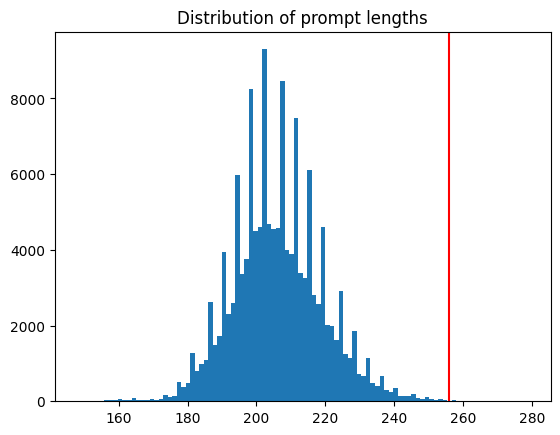

In [3]:
import matplotlib.pyplot as plt

lens = [len(x["prompt"]["input_ids"]) for x in data["train"]]
plt.hist(lens, bins=100)
plt.title("Distribution of prompt lengths")
plt.axvline(256, color="red")

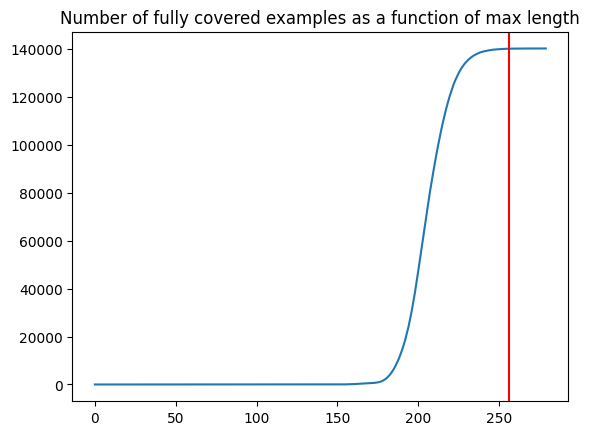

In [4]:
plt.plot([len([l for l in lens if l <= m]) for m in range(max(lens) + 1)])
plt.title("Number of fully covered examples as a function of max length")
plt.axvline(x=256, color="red")

Percentage of tokens left out:

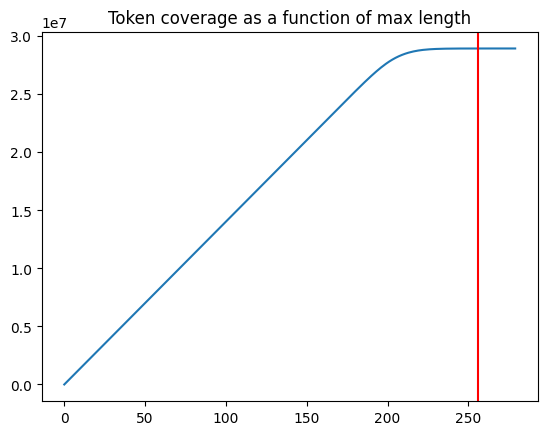

In [5]:
plt.plot([sum(min(l, m) for l in lens) for m in range(max(lens) + 1)])
plt.title("Token coverage as a function of max length")
plt.axvline(x=256, color="red")